In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('StudentPerf.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.shape

(1000, 8)

In [6]:
df.ndim

2

In [9]:
df.rename(columns = {
    'race/ethnicity':'race',
    'parental level of education':'parent_edu',
    'test preparation course':'test_prep',
    'math score':'math',
    'reading score':'reading',
    'writing score':'writing',
    
}, inplace = True)

In [10]:
df.head()

,gender,race,parent_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.isnull().sum()

gender        0
race          0
parent_edu    0
lunch         0
test_prep     0
math          0
reading       0
writing       0
dtype: int64

In [12]:
df.dtypes

gender        object
race          object
parent_edu    object
lunch         object
test_prep     object
math           int64
reading        int64
writing        int64
dtype: object

In [13]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

<Axes: ylabel='writing'>

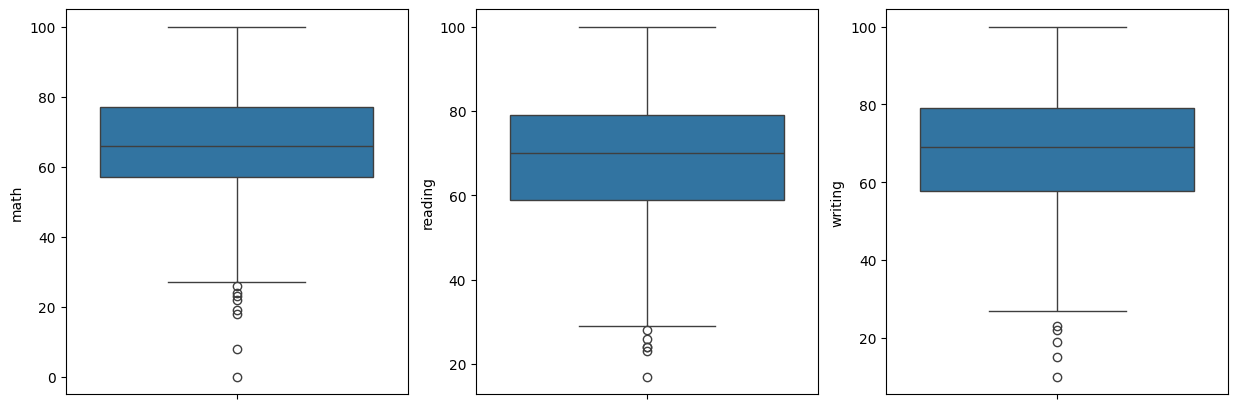

In [26]:
fig, axes = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(data = df['math'], ax = axes[0])
sns.boxplot(data = df['reading'], ax = axes[1])
sns.boxplot(data = df['writing'], ax = axes[2])

<Axes: xlabel='writing', ylabel='Count'>

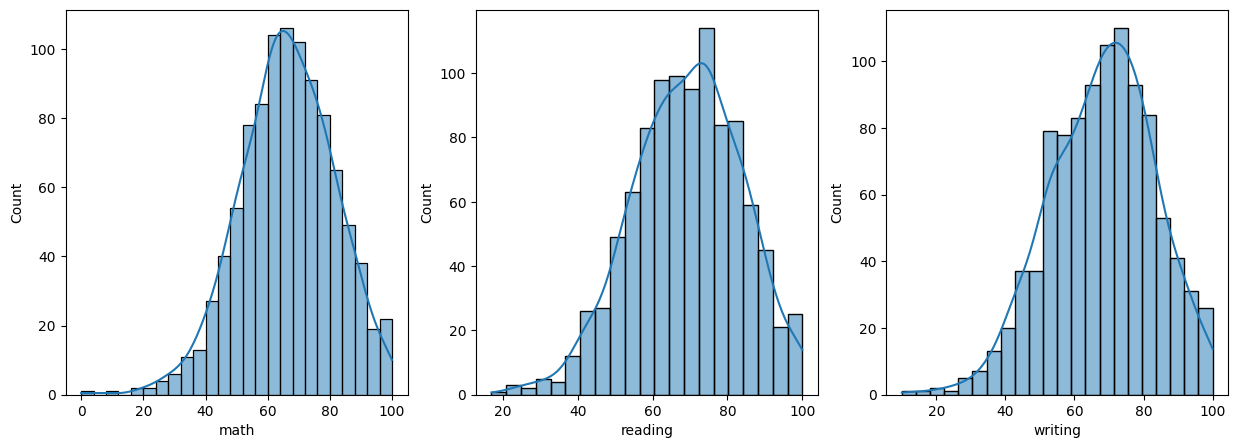

In [38]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.histplot(data = df['math'], ax = axes[0], kde=True)
sns.histplot(data = df['reading'], ax = axes[1], kde=True)
sns.histplot(data = df['writing'], ax = axes[2], kde=True)

In [39]:
import numpy as np

In [43]:
q3, q1 = np.percentile(df['math'], [75,25])
iqr = q3-q1
df = df[(df['math'] <= q3 + 1.5*iqr) & (df['math'] >= q1 - 1.5*iqr)]

In [44]:
df

,gender,race,parent_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [45]:
q3, q1 = np.percentile(df['reading'], [75,25])
iqr = q3-q1
df = df[(df['reading'] <= q3 + 1.5*iqr) & (df['reading'] >= q1 - 1.5*iqr)]

In [46]:
q3, q1 = np.percentile(df['writing'], [75,25])
iqr = q3-q1
df = df[(df['writing'] <= q3 + 1.5*iqr) & (df['writing'] >= q1 - 1.5*iqr)]

In [47]:
df

,gender,race,parent_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [48]:
df['parent_edu'].value_counts()

parent_edu
some college          222
associate's degree    221
high school           191
some high school      175
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [49]:
df['math'] = (df['math'] - df['math'].min())/(df['math'].max() - df['math'].min())

In [51]:
df['reading'] = (df['reading'] - df['reading'].min())/(df['reading'].max() - df['reading'].min())

In [52]:
df['writing'] = (df['writing'] - df['writing'].min())/(df['writing'].max() - df['writing'].min())

In [53]:
df

,gender,race,parent_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,0.616438,0.594203,0.617647
1,female,group C,some college,standard,completed,0.575342,0.855072,0.823529
2,female,group B,master's degree,standard,none,0.863014,0.927536,0.897059
3,male,group A,associate's degree,free/reduced,none,0.273973,0.376812,0.176471
4,male,group C,some college,standard,none,0.671233,0.681159,0.632353
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.835616,0.985507,0.926471
996,male,group C,high school,free/reduced,none,0.479452,0.347826,0.338235
997,female,group C,high school,free/reduced,completed,0.438356,0.579710,0.485294
998,female,group D,some college,standard,completed,0.561644,0.681159,0.661765


<Axes: xlabel='writing', ylabel='Count'>

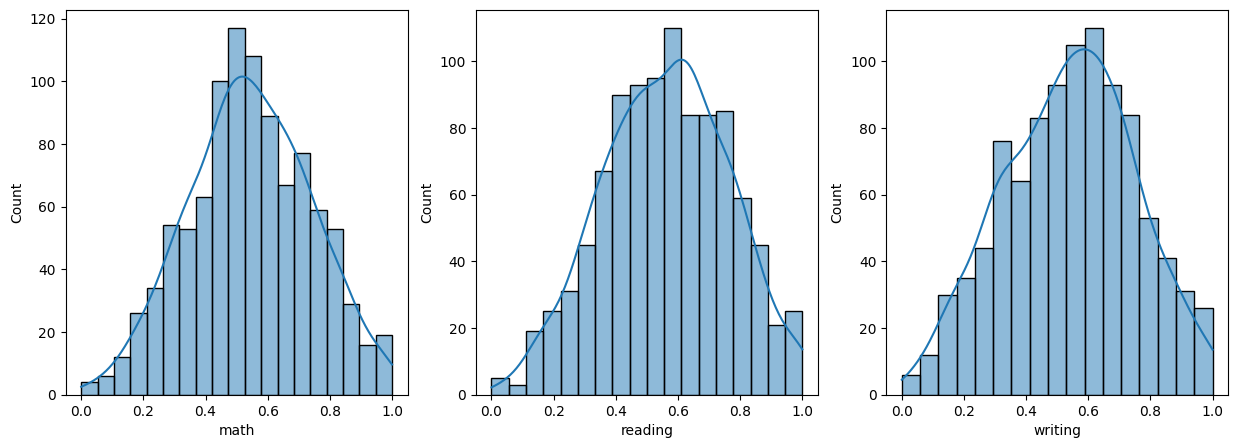

In [55]:
fig, axes = plt.subplots(1,3,figsize = (15,5))

sns.histplot(data = df['math'], ax = axes[0], kde = True)
sns.histplot(data = df['reading'], ax = axes[1], kde = True)
sns.histplot(data = df['writing'], ax = axes[2], kde = True)

<Axes: ylabel='writing'>

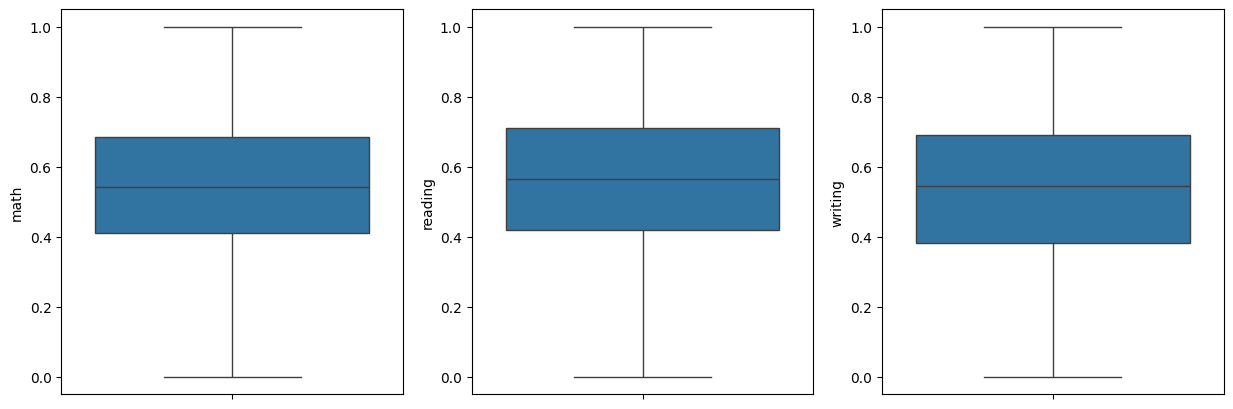

In [56]:
fig, axes = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(data = df['math'], ax = axes[0])
sns.boxplot(data = df['reading'], ax = axes[1])
sns.boxplot(data = df['writing'], ax = axes[2])

In [57]:
z_score_series = (df['math'] - df['math'].mean())/(df['math'].std())

df = df[ (z_score_series <= 3) & (z_score_series >= -3)]

In [63]:
z_score_series = (df['reading'] - df['reading'].mean())/(df['reading'].std())

df = df[ (z_score_series <= 3) & (z_score_series >= -3)]

In [62]:
z_score_series = (df['writing'] - df['writing'].mean())/(df['writing'].std())

df = df[ (z_score_series <= 3) & (z_score_series >= -3)]

In [64]:
df

,gender,race,parent_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,0.616438,0.594203,0.617647
1,female,group C,some college,standard,completed,0.575342,0.855072,0.823529
2,female,group B,master's degree,standard,none,0.863014,0.927536,0.897059
3,male,group A,associate's degree,free/reduced,none,0.273973,0.376812,0.176471
4,male,group C,some college,standard,none,0.671233,0.681159,0.632353
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.835616,0.985507,0.926471
996,male,group C,high school,free/reduced,none,0.479452,0.347826,0.338235
997,female,group C,high school,free/reduced,completed,0.438356,0.579710,0.485294
998,female,group D,some college,standard,completed,0.561644,0.681159,0.661765


In [65]:
df['writing'].skew()

np.float64(-0.0843623363337937)